In [2]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math
%matplotlib inline

qasm_sim = q.Aer.get_backend("qasm_simulator")
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [13]:
# uncertain qubits
c = q.QuantumCircuit(2, 2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()


┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

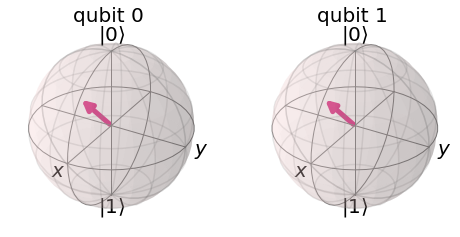

In [6]:
plot_bloch_multivector(orig_statevec)

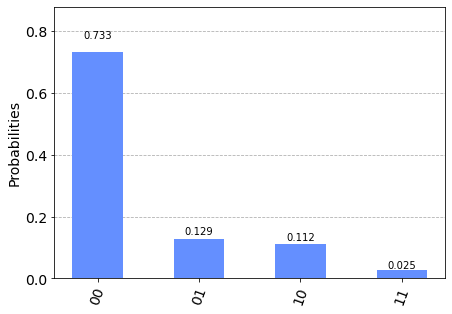

In [10]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(orig_counts)

In [14]:
# uncertain qubits, hadamards at front
c = q.QuantumCircuit(2, 2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─────────┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤M├───
     ├───┤├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

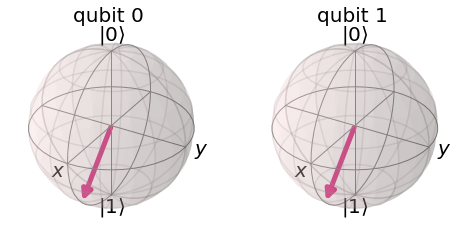

In [15]:
plot_bloch_multivector(statevec)

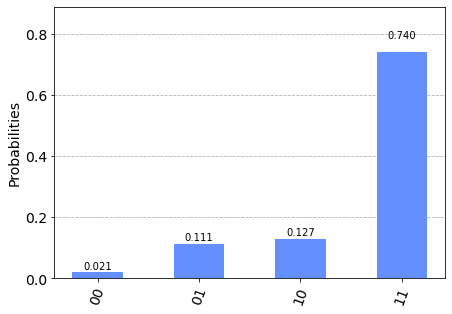

In [16]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(counts)

In [17]:
# uncertain qubits, hadamards at both side, hadamard sandwich
c = q.QuantumCircuit(2, 2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

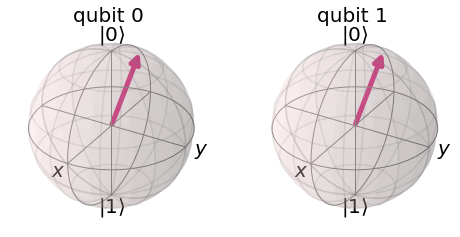

In [18]:
plot_bloch_multivector(statevec)

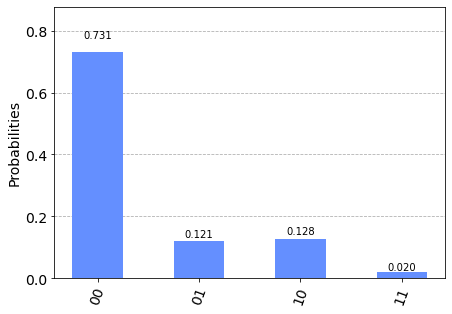

In [19]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(counts)

In [20]:
# certain qubits
c = q.QuantumCircuit(2, 2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

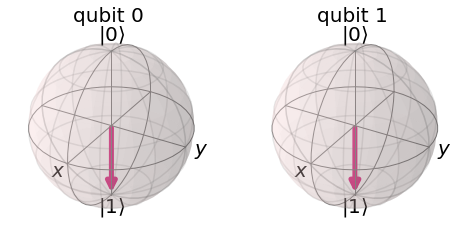

In [21]:
plot_bloch_multivector(orig_statevec)

In [22]:
# hadamard in front of certain qubits
c = q.QuantumCircuit(2, 2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├┤M├───
     ├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

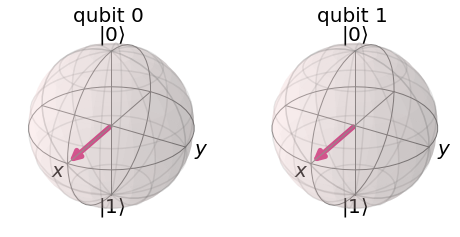

In [23]:
plot_bloch_multivector(statevec)

In [24]:
# certain qubits, hadamards at both side, hadamard sandwich
c = q.QuantumCircuit(2, 2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├┤ H ├┤M├───
     ├───┤├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├┤ H ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

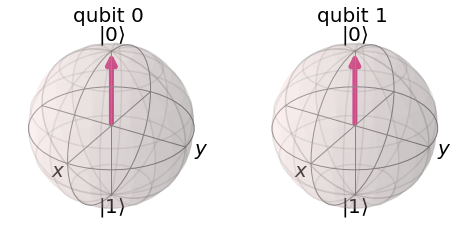

In [25]:
plot_bloch_multivector(statevec)

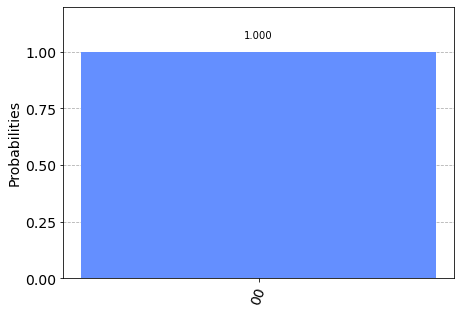

In [26]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(counts)

In [27]:
def balanced_black_box(c):
    c.cx(0, 2)
    c.cx(1, 2)
    return c
    
def constant_black_box(c):
    return c

In [28]:
c = q.QuantumCircuit(3, 2)
c = balanced_black_box(c)
c.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

In [29]:
c = q.QuantumCircuit(3, 2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
#c.h(2)
c.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├─────
     ├───┤  │  └───┘┌───┐
q_1: ┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘     
c: 2/════════════════════

In [33]:
c = q.QuantumCircuit(3, 2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
#c.h(2)
c.measure([0, 1], [0, 1])
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

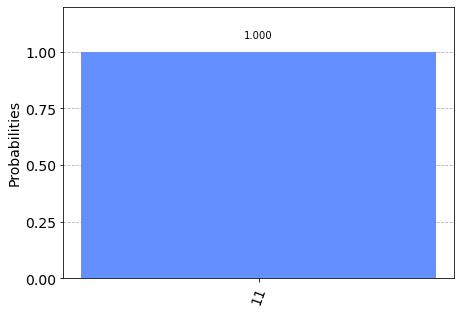

In [34]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(counts)

In [35]:
c = q.QuantumCircuit(3, 2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
#c.h(2)
c.measure([0, 1], [0, 1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c: 2/═════════════════════════╩══╩═
                              0  1

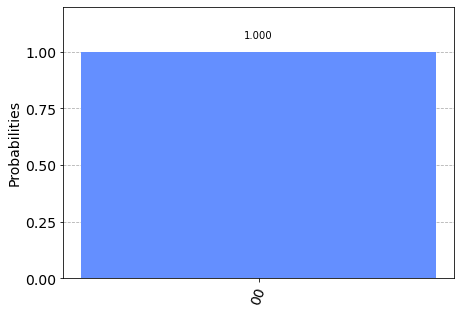

In [36]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram(counts)